# Boston 주택 가격 예측 모델

### 데이터 로드

In [97]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [98]:
# # keras.datasets 안에 boston_housing 데이터셋을 로드
# from keras.datasets import boston_housing

# (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# # 데이터셋의 크기를 확인
# print(len(train_data))
# print(len(test_data))

In [99]:
from keras.datasets import boston_housing

(train_data_full, train_labels_full), (test_data, test_labels) = boston_housing.load_data()


# 데이터셋의 크기를 확인
print(len(train_data))
print(len(test_data))

404
102


In [100]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data_full, train_labels_full,
                                                    test_size=0.2, 
                                                    random_state=0)

print("\n--- 데이터 분할 결과 ---")
print(f"원본 전체 훈련 데이터: {train_data_full.shape}  레이블: {train_labels_full.shape}")
print(f"학습용 데이터 (x_train): {x_train.shape}  레이블: {y_train.shape}") 
print(f"검증용 데이터 (x_val): {x_val.shape}  레이블: {y_val.shape}")  
print(f"최종 테스트용 데이터: {test_data.shape}  레이블: {test_labels.shape}") 


--- 데이터 분할 결과 ---
원본 전체 훈련 데이터: (404, 13)  레이블: (404,)
학습용 데이터 (x_train): (323, 13)  레이블: (323,)
검증용 데이터 (x_val): (81, 13)  레이블: (81,)
최종 테스트용 데이터: (102, 13)  레이블: (102,)


In [101]:
print(x_train[0])

[  8.98296   0.       18.1       1.        0.77      6.212    97.4
   2.1222   24.      666.       20.2     377.73     17.6    ]


### 데이터 전처리

In [102]:
mean = x_train.mean(axis=0)

In [103]:
x_train -= mean

In [104]:
std = x_train.std(axis=0)

In [105]:
x_train /= std

In [106]:
x_val-= mean
x_val/= std

In [107]:
test_data -= mean
test_data /= std

In [108]:
x_train

array([[ 0.70364725, -0.49820006,  1.04968204, ...,  0.81033358,
         0.2335403 ,  0.6878178 ],
       [ 1.8408904 , -0.49820006,  1.04968204, ...,  0.81033358,
         0.40936652,  1.26048253],
       [ 0.9406319 , -0.49820006,  1.04968204, ...,  0.81033358,
        -3.6779069 ,  1.80985708],
       ...,
       [-0.42452996,  0.01441022, -0.45233982, ..., -1.43480064,
         0.33216113,  0.61931723],
       [-0.31796982, -0.49820006, -0.41269702, ...,  1.16955506,
         0.26099598, -0.08212857],
       [ 0.17273603, -0.49820006,  1.04968204, ...,  0.81033358,
         0.34874436, -0.15473918]])

### 모델 구성 및 컴파일 

In [109]:
x_train.shape[1]

13

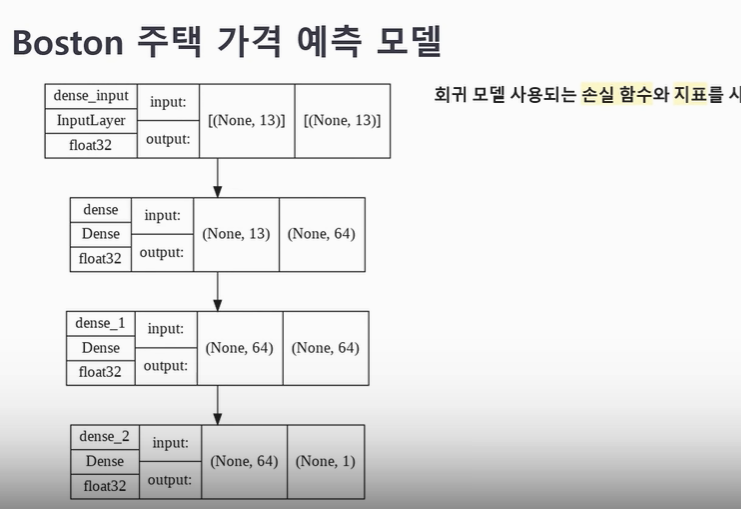

In [110]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu',))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [112]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 611.8979 - mae: 23.0362 - val_loss: 521.8503 - val_mae: 21.0749
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 546.7186 - mae: 21.7192 - val_loss: 486.9021 - val_mae: 20.2208
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 524.3068 - mae: 21.0374 - val_loss: 440.6006 - val_mae: 19.0480
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 473.6289 - mae: 19.8438 - val_loss: 379.2549 - val_mae: 17.3854
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 385.6124 - mae: 17.8351 - val_loss: 303.3085 - val_mae: 15.2996
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 274.7937 - mae: 14.5409 - val_loss: 218.1642 - val_mae: 12.7937
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 214.0559 - mae: 11.9709 - val_loss: 140.0134 - val_mae: 9.9497
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 115.8807 - mae: 8.5451 - val_loss: 89.8343 - val_mae: 7.6035
Epoch 9/50
11/11 ━━━

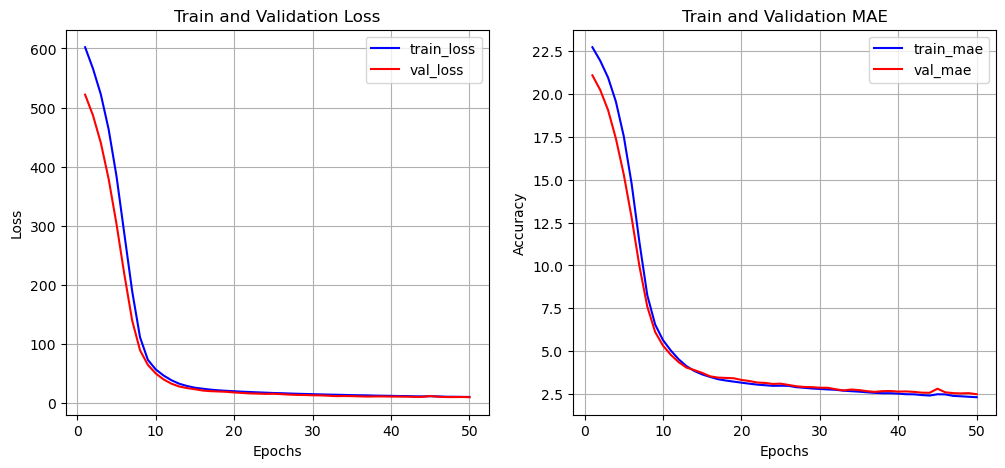

In [113]:
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [114]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.2848 - mae: 3.0292 


[24.256269454956055, 3.245830535888672]

# Reuters 딥러닝 모델

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [118]:
from sklearn.model_selection import train_test_split
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
x_train, x_val, y_train, y_val = train_test_split(train_data_full, train_labels_full,
                                                    test_size=0.25, 
                                                    random_state=0)

print("\n--- 데이터 분할 결과 ---")
print(f"원본 전체 훈련 데이터: {train_data_full.shape}  레이블: {train_labels_full.shape}")
print(f"학습용 데이터 (x_train): {x_train.shape}  레이블: {y_train.shape}") 
print(f"검증용 데이터 (x_val): {x_val.shape}  레이블: {y_val.shape}")  
print(f"최종 테스트용 데이터: {test_data.shape}  레이블: {test_labels.shape}") 


--- 데이터 분할 결과 ---
원본 전체 훈련 데이터: (8982,)  레이블: (8982,)
학습용 데이터 (x_train): (6736,)  레이블: (6736,)
검증용 데이터 (x_val): (2246,)  레이블: (2246,)
최종 테스트용 데이터: (2246,)  레이블: (2246,)


In [132]:
print(len(x_train))
print(len(x_val))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
201


In [142]:
test_data

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260

In [154]:
import numpy as np

def one_hot_encoding(data, dim=10000): 
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, np.array(d, dtype=int)] = 1.  
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

### 모델 구성 및 컴파일

In [162]:
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train_text, x_val_text, y_train, y_val = train_test_split(train_data_full, train_labels_full, test_size=0.25, random_state=0)

x_train = one_hot_encoding(x_train_text)
x_val = one_hot_encoding(x_val_text)
x_test = one_hot_encoding(test_data)

y_train = to_categorical(y_train, num_classes=46)
y_val = to_categorical(y_val, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)

In [159]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(46, activation='softmax')  # 46개의 뉴스 주제 분류
])

In [160]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [161]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.2091 - loss: 3.7738 - val_accuracy: 0.5672 - val_loss: 3.3104
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.6037 - loss: 1.8337 - val_accuracy: 0.6817 - val_loss: 2.7235
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.7174 - loss: 1.3367 - val_accuracy: 0.6955 - val_loss: 2.3147
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.7653 - loss: 1.0582 - val_accuracy: 0.6897 - val_loss: 2.0237
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.8080 - loss: 0.8650 - val_accuracy: 0.6679 - val_loss: 1.8184
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.8355 - loss: 0.7404 - val_accuracy: 0.6696 - val_loss: 1.6614
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.8535 - loss: 0.6436 - val_accuracy: 0.6532 - val_loss: 1.5534
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8783 - loss: 0.5341 - val_accuracy: 0

### 모델 학습

In [163]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [164]:
checkpoint = ModelCheckpoint(
    'best_model.h5',            
    monitor='val_loss',        
    save_best_only=True,        
    mode='min',                
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=5,               
    mode='min',               
    verbose=1,
    restore_best_weights=True  
)

In [167]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop],
    verbose=2
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.04713, saving model to best_model.h5


53/53 - 8s - 142ms/step - accuracy: 0.9454 - loss: 0.2465 - val_accuracy: 0.8037 - val_loss: 1.0471
Epoch 2/50

Epoch 2: val_loss did not improve from 1.04713
53/53 - 7s - 123ms/step - accuracy: 0.9418 - loss: 0.2514 - val_accuracy: 0.8041 - val_loss: 1.0976
Epoch 3/50

Epoch 3: val_loss did not improve from 1.04713
53/53 - 6s - 121ms/step - accuracy: 0.9418 - loss: 0.2331 - val_accuracy: 0.8126 - val_loss: 1.2131
Epoch 4/50

Epoch 4: val_loss did not improve from 1.04713
53/53 - 7s - 123ms/step - accuracy: 0.9470 - loss: 0.2181 - val_accuracy: 0.8139 - val_loss: 1.2118
Epoch 5/50

Epoch 5: val_loss did not improve from 1.04713
53/53 - 7s - 132ms/step - accuracy: 0.9473 - loss: 0.2022 - val_accuracy: 0.8130 - val_loss: 1.2518
Epoch 6/50

Epoch 6: val_loss did not improve from 1.04713
53/53 - 6s - 122ms/step - accuracy: 0.9528 - loss: 0.1777 - val_accuracy: 0.8166 - val_loss: 1.3026
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


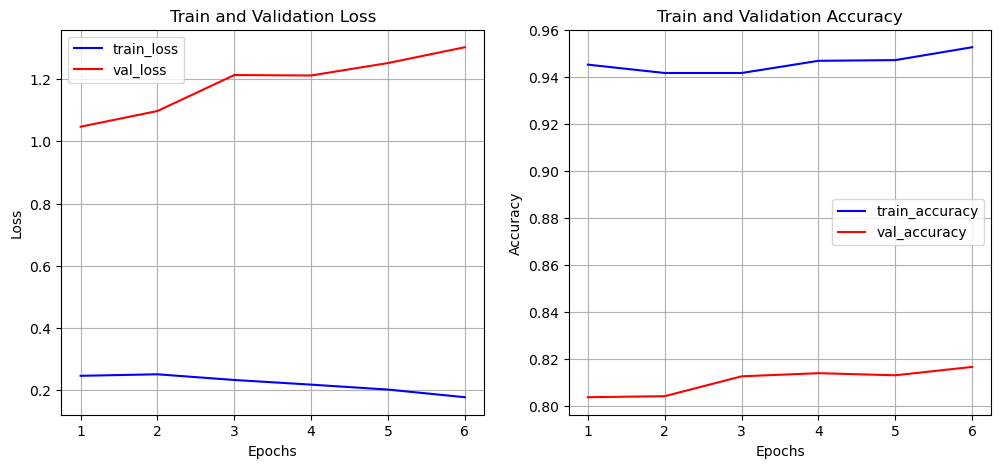

In [168]:
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [169]:
y_test = to_categorical(test_labels, num_classes=46)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"\n테스트 손실 (loss): {test_loss:.4f}")
print(f"테스트 정확도 (accuracy): {test_accuracy:.4f}")

71/71 - 1s - 11ms/step - accuracy: 0.7952 - loss: 1.0885

테스트 손실 (loss): 1.0885
테스트 정확도 (accuracy): 0.7952


# CIFAR10 딥러닝 모델

In [171]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [172]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.2,
    random_state=0
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [173]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [174]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

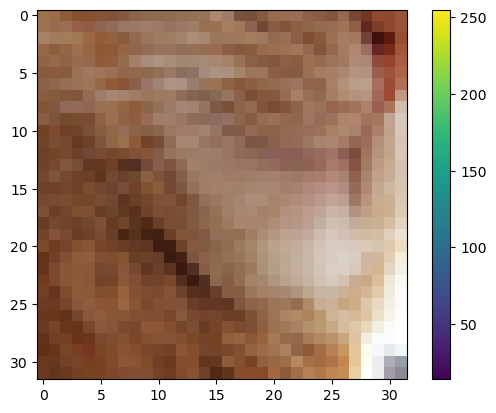

In [175]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [176]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [177]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(10, activation='softmax')  # 10개 클래스 분류
])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

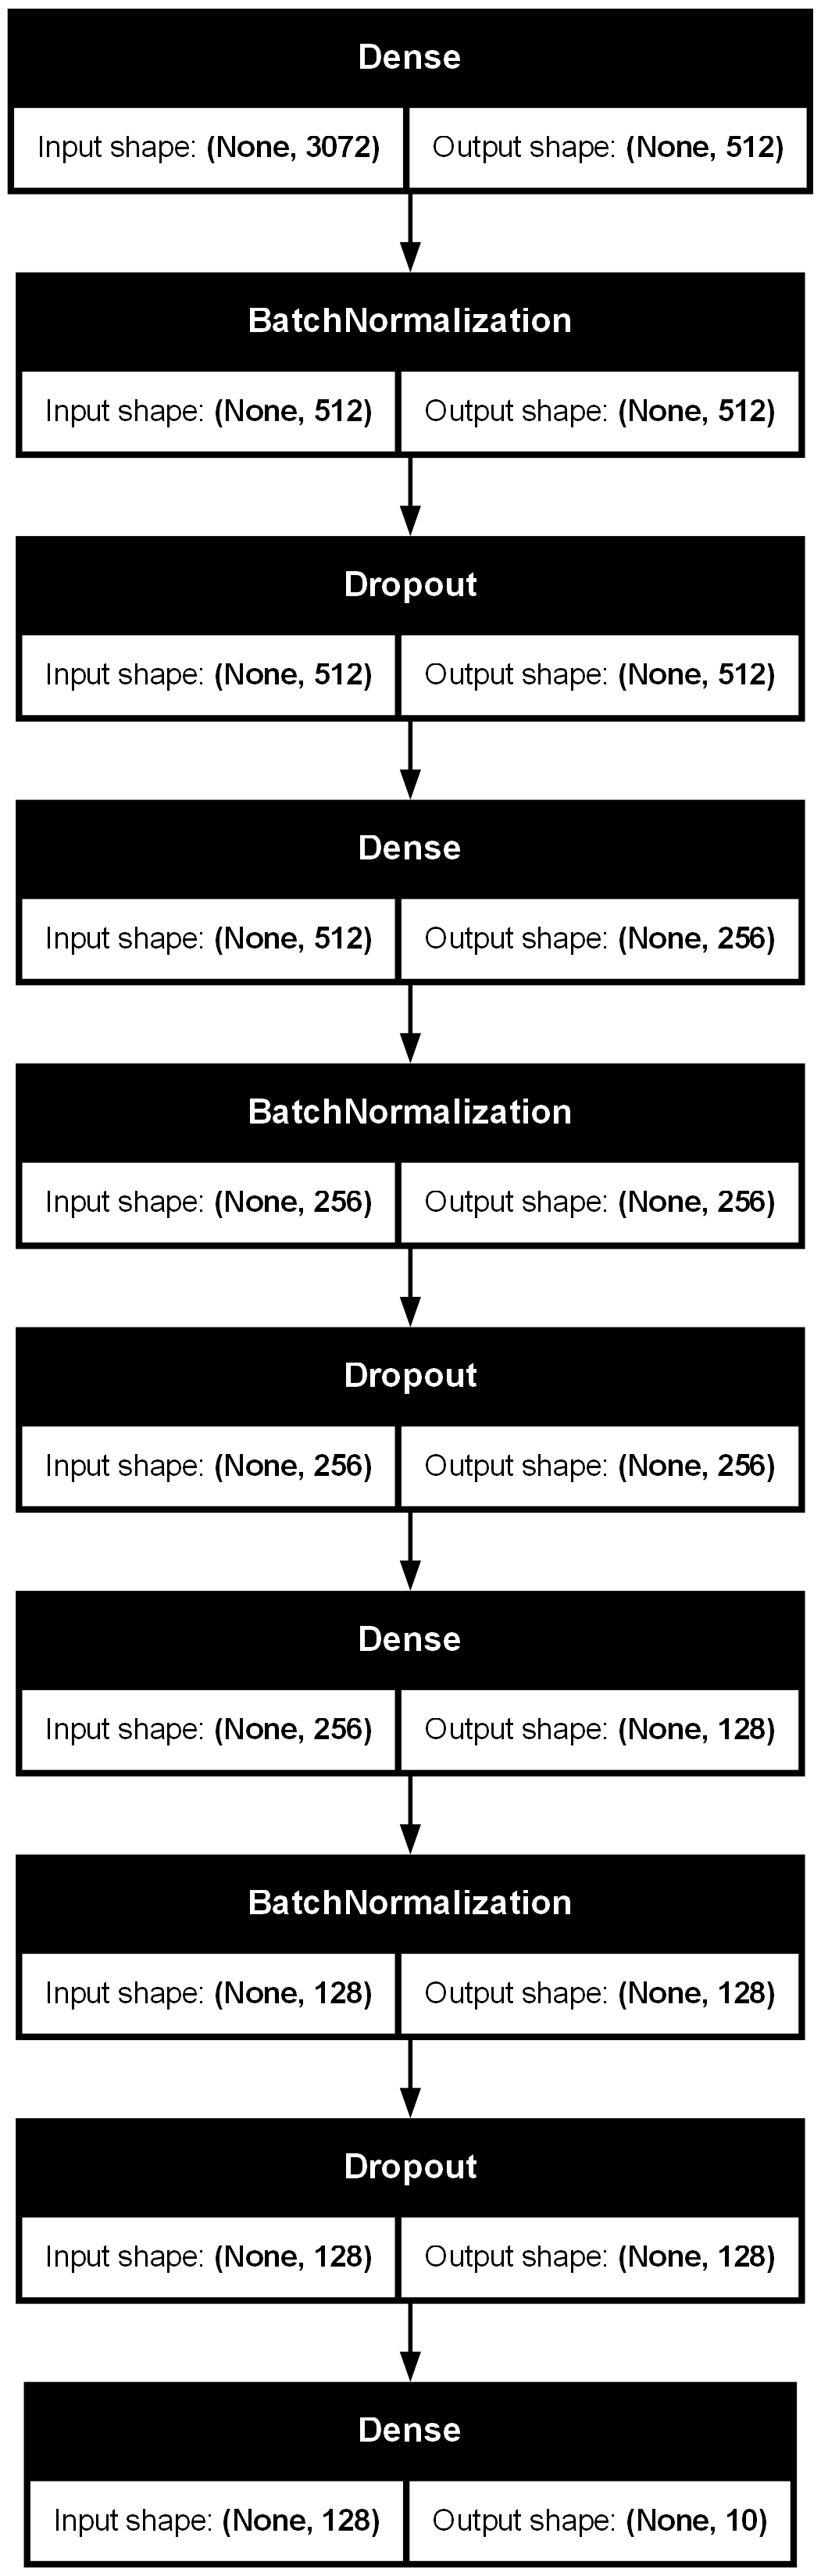

In [186]:
utils.plot_model(model, show_shapes=True)

In [187]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_cifar10.h5',  
    monitor='val_loss',      
    save_best_only=True,                  
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,                            
    verbose=1,
    restore_best_weights=True 
)

In [192]:
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [193]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [194]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3775 - loss: 1.7506
Epoch 1: val_loss improved from 1.62555 to 1.59017, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.3775 - loss: 1.7506 - val_accuracy: 0.4283 - val_loss: 1.5902
Epoch 2/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3805 - loss: 1.7339
Epoch 2: val_loss improved from 1.59017 to 1.58447, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3805 - loss: 1.7339 - val_accuracy: 0.4287 - val_loss: 1.5845
Epoch 3/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3842 - loss: 1.7347
Epoch 3: val_loss improved from 1.58447 to 1.58170, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3842 - loss: 1.7347 - val_accuracy: 0.4351 - val_loss: 1.5817
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3836 - loss: 1.7376
Epoch 4: val_loss improved from 1.58170 to 1.57867, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3836 - loss: 1.7376 - val_accuracy: 0.4331 - val_loss: 1.5787
Epoch 5/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3854 - loss: 1.7305
Epoch 5: val_loss improved from 1.57867 to 1.57676, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3854 - loss: 1.7304 - val_accuracy: 0.4282 - val_loss: 1.5768
Epoch 6/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3897 - loss: 1.7166
Epoch 6: val_loss did not improve from 1.57676
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3897 - loss: 1.7167 - val_accuracy: 0.4303 - val_loss: 1.5769
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3852 - loss: 1.7205
Epoch 7: val_loss improved from 1.57676 to 1.57301, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3852 - loss: 1.7205 - val_accuracy: 0.4353 - val_loss: 1.5730
Epoch 8/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3848 - loss: 1.7204
Epoch 8: val_loss improved from 1.57301 to 1.57122, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3848 - loss: 1.7204 - val_accuracy: 0.4359 - val_loss: 1.5712
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3767 - loss: 1.7306
Epoch 9: val_loss improved from 1.57122 to 1.56987, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3767 - loss: 1.7306 - val_accuracy: 0.4336 - val_loss: 1.5699
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3878 - loss: 1.7104
Epoch 10: val_loss did not improve from 1.56987
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3878 - loss: 1.7105 - val_accuracy: 0.4362 - val_loss: 1.5707
Epoch 11/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3889 - loss: 1.7142
Epoch 11: val_loss improved from 1.56987 to 1.56783, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3889 - loss: 1.7142 - val_accuracy: 0.4358 - val_loss: 1.5678
Epoch 12/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3882 - loss: 1.7109
Epoch 12: val_loss improved from 1.56783 to 1.56432, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3882 - loss: 1.7109 - val_accuracy: 0.4394 - val_loss: 1.5643
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3841 - loss: 1.7198
Epoch 13: val_loss did not improve from 1.56432
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3841 - loss: 1.7198 - val_accuracy: 0.4338 - val_loss: 1.5673
Epoch 14/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3883 - loss: 1.7114
Epoch 14: val_loss improved from 1.56432 to 1.56420, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3883 - loss: 1.7114 - val_accuracy: 0.4332 - val_loss: 1.5642
Epoch 15/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3887 - loss: 1.7197
Epoch 15: val_loss improved from 1.56420 to 1.56191, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3887 - loss: 1.7197 - val_accuracy: 0.4375 - val_loss: 1.5619
Epoch 16/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3907 - loss: 1.7011
Epoch 16: val_loss did not improve from 1.56191
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3907 - loss: 1.7011 - val_accuracy: 0.4357 - val_loss: 1.5637
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3934 - loss: 1.7024
Epoch 17: val_loss improved from 1.56191 to 1.55946, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3934 - loss: 1.7024 - val_accuracy: 0.4392 - val_loss: 1.5595
Epoch 18/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3919 - loss: 1.7022
Epoch 18: val_loss improved from 1.55946 to 1.55790, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3918 - loss: 1.7022 - val_accuracy: 0.4402 - val_loss: 1.5579
Epoch 19/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3935 - loss: 1.7072
Epoch 19: val_loss improved from 1.55790 to 1.55704, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.3935 - loss: 1.7072 - val_accuracy: 0.4418 - val_loss: 1.5570
Epoch 20/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3915 - loss: 1.7059
Epoch 20: val_loss improved from 1.55704 to 1.55680, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3915 - loss: 1.7059 - val_accuracy: 0.4414 - val_loss: 1.5568
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3895 - loss: 1.7066
Epoch 21: val_loss did not improve from 1.55680
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3895 - loss: 1.7066 - val_accuracy: 0.4381 - val_loss: 1.5594
Epoch 22/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3926 - loss: 1.7024
Epoch 22: val_loss improved from 1.55680 to 1.55549, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.3926 - loss: 1.7024 - val_accuracy: 0.4386 - val_loss: 1.5555
Epoch 23/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3912 - loss: 1.7035
Epoch 23: val_loss improved from 1.55549 to 1.55373, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.3912 - loss: 1.7035 - val_accuracy: 0.4427 - val_loss: 1.5537
Epoch 24/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3985 - loss: 1.6946
Epoch 24: val_loss did not improve from 1.55373
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3985 - loss: 1.6946 - val_accuracy: 0.4385 - val_loss: 1.5562
Epoch 25/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3873 - loss: 1.7126
Epoch 25: val_loss did not improve from 1.55373
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3873 - loss: 1.7126 - val_accuracy: 0.4396 - val_loss: 1.5546
Epoch 26/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3926 - loss: 1.7055
Epoch 26: val_loss improved from 1.55373 to 1.55081, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.3925 - loss: 1.7055 - val_accuracy: 0.4408 - val_loss: 1.5508
Epoch 27/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3942 - loss: 1.7018
Epoch 27: val_loss did not improve from 1.55081
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3942 - loss: 1.7018 - val_accuracy: 0.4416 - val_loss: 1.5522
Epoch 28/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3966 - loss: 1.6957
Epoch 28: val_loss improved from 1.55081 to 1.54896, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3966 - loss: 1.6957 - val_accuracy: 0.4426 - val_loss: 1.5490
Epoch 29/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3962 - loss: 1.6936
Epoch 29: val_loss improved from 1.54896 to 1.54884, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3962 - loss: 1.6936 - val_accuracy: 0.4428 - val_loss: 1.5488
Epoch 30/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3907 - loss: 1.7079
Epoch 30: val_loss did not improve from 1.54884
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3907 - loss: 1.7079 - val_accuracy: 0.4406 - val_loss: 1.5511
Epoch 31/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3917 - loss: 1.7126
Epoch 31: val_loss improved from 1.54884 to 1.54760, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3918 - loss: 1.7125 - val_accuracy: 0.4439 - val_loss: 1.5476
Epoch 32/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3945 - loss: 1.6962
Epoch 32: val_loss did not improve from 1.54760
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3945 - loss: 1.6962 - val_accuracy: 0.4442 - val_loss: 1.5498
Epoch 33/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3936 - loss: 1.6924
Epoch 33: val_loss improved from 1.54760 to 1.54742, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3936 - loss: 1.6924 - val_accuracy: 0.4430 - val_loss: 1.5474
Epoch 34/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3933 - loss: 1.7028
Epoch 34: val_loss improved from 1.54742 to 1.54616, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3933 - loss: 1.7028 - val_accuracy: 0.4424 - val_loss: 1.5462
Epoch 35/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3910 - loss: 1.7055
Epoch 35: val_loss improved from 1.54616 to 1.54486, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3910 - loss: 1.7054 - val_accuracy: 0.4448 - val_loss: 1.5449
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3932 - loss: 1.6949
Epoch 36: val_loss did not improve from 1.54486
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3932 - loss: 1.6949 - val_accuracy: 0.4434 - val_loss: 1.5449
Epoch 37/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3975 - loss: 1.6999
Epoch 37: val_loss improved from 1.54486 to 1.54366, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3975 - loss: 1.6999 - val_accuracy: 0.4439 - val_loss: 1.5437
Epoch 38/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3990 - loss: 1.6935
Epoch 38: val_loss did not improve from 1.54366
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.3989 - loss: 1.6936 - val_accuracy: 0.4432 - val_loss: 1.5470
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3960 - loss: 1.6943
Epoch 39: val_loss did not improve from 1.54366
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.3960 - loss: 1.6943 - val_accuracy: 0.4443 - val_loss: 1.5443
Epoch 40/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3917 - loss: 1.6993
Epoch 40: val_loss did not improve from 1.54366
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3917 - loss: 1.6992 - val_accuracy: 0.4420 - val_loss: 1.5454
Epoch 41/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3964 - loss: 1.6899
Epoch 41: val_loss improved 

625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3964 - loss: 1.6899 - val_accuracy: 0.4456 - val_loss: 1.5414
Epoch 42/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3976 - loss: 1.6973
Epoch 42: val_loss improved from 1.54135 to 1.54060, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.3976 - loss: 1.6973 - val_accuracy: 0.4453 - val_loss: 1.5406
Epoch 43/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3916 - loss: 1.6880
Epoch 43: val_loss improved from 1.54060 to 1.53777, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.3916 - loss: 1.6880 - val_accuracy: 0.4429 - val_loss: 1.5378
Epoch 44/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3956 - loss: 1.6941
Epoch 44: val_loss improved from 1.53777 to 1.53758, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3956 - loss: 1.6941 - val_accuracy: 0.4470 - val_loss: 1.5376
Epoch 45/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3942 - loss: 1.6963
Epoch 45: val_loss improved from 1.53758 to 1.53692, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3942 - loss: 1.6962 - val_accuracy: 0.4504 - val_loss: 1.5369
Epoch 46/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4021 - loss: 1.6879
Epoch 46: val_loss improved from 1.53692 to 1.53663, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4021 - loss: 1.6879 - val_accuracy: 0.4494 - val_loss: 1.5366
Epoch 47/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3987 - loss: 1.6837
Epoch 47: val_loss did not improve from 1.53663
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3987 - loss: 1.6837 - val_accuracy: 0.4462 - val_loss: 1.5371
Epoch 48/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3948 - loss: 1.6879
Epoch 48: val_loss improved from 1.53663 to 1.53470, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3948 - loss: 1.6879 - val_accuracy: 0.4460 - val_loss: 1.5347
Epoch 49/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3998 - loss: 1.6907
Epoch 49: val_loss improved from 1.53470 to 1.53435, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3998 - loss: 1.6907 - val_accuracy: 0.4481 - val_loss: 1.5343
Epoch 50/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3977 - loss: 1.6817
Epoch 50: val_loss improved from 1.53435 to 1.53376, saving model to best_cifar10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.3977 - loss: 1.6817 - val_accuracy: 0.4441 - val_loss: 1.5338
Restoring model weights from the end of the best epoch: 50.


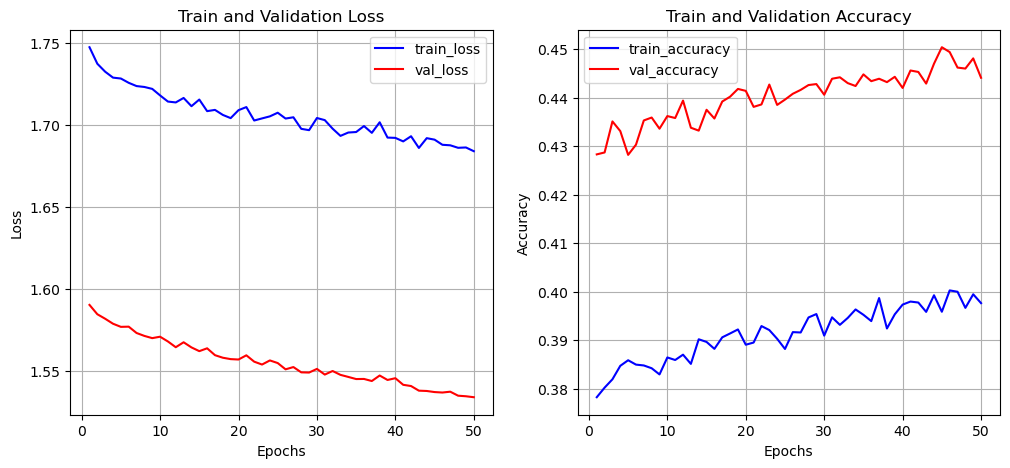

In [195]:
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [196]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4514 - loss: 1.5224


[1.5284072160720825, 0.45399999618530273]